## Diabetes Prediction

In [1]:
from sklearn.datasets import load_diabetes

In [2]:
dataset=load_diabetes()

In [5]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [4]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [8]:
import pandas as pd
df_diabetes=pd.DataFrame(dataset.data,columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
## Independent and dependent feature
X=df_diabetes
y=dataset['target']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [11]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,0.029375,-0.017629,0.034309,0.070207,0.007207
389,-0.005515,0.050680,0.001339,-0.084856,-0.011201,-0.016658,0.048640,-0.039493,-0.041176,-0.088062
121,0.063504,-0.044642,0.017506,0.021872,0.008063,0.021546,-0.036038,0.034309,0.019907,0.011349
195,0.027178,0.050680,0.025051,0.014987,0.025950,0.048477,-0.039719,0.034309,0.007838,0.023775
69,0.016281,-0.044642,-0.046085,-0.005670,-0.075870,-0.061438,-0.013948,-0.039493,-0.051404,0.019633


In [ ]:
## Corellation
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


<Axes: >

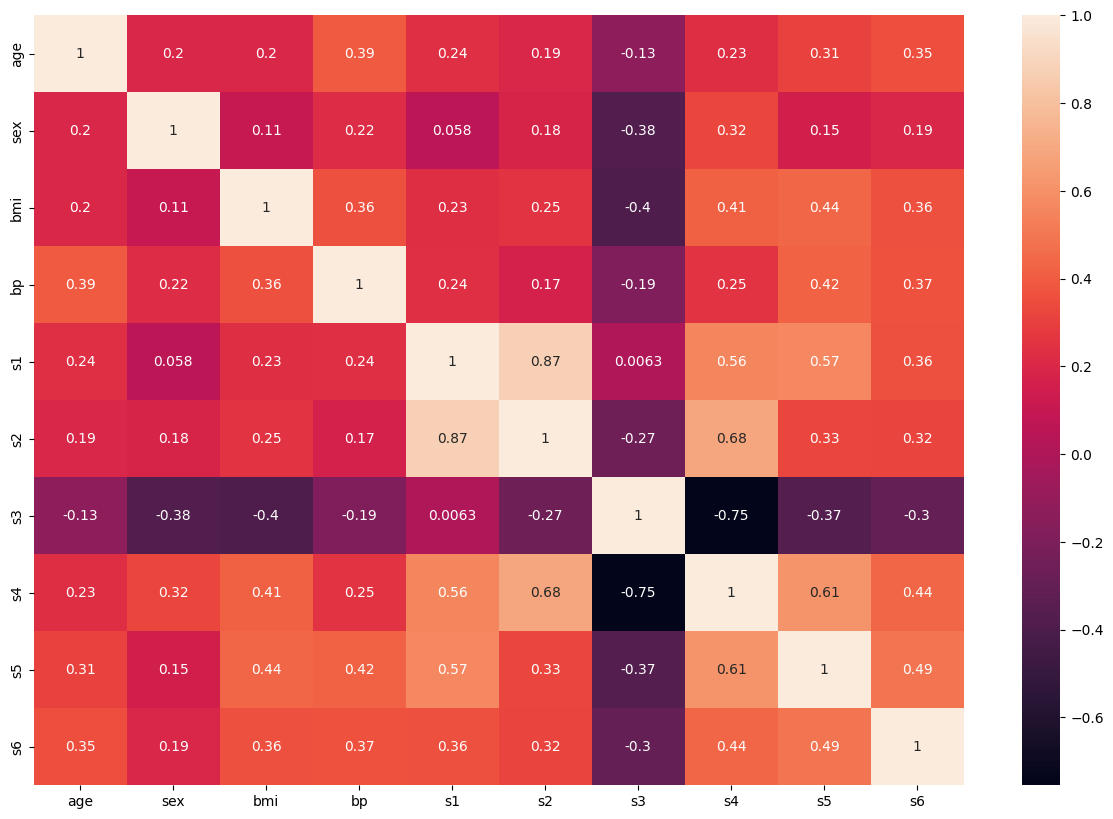

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)


In [14]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

## Hyperparameter Tunning

In [20]:
params={
    'criterion':["gini", "entropy", 'friedman_mse', 'poisson', 'absolute_error', 'squared_error'],
    'splitter':["best", "random"],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':[int, float or "sqrt", "log2"]
}

In [21]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(regressor,cv=5,scoring='neg_mean_squared_error',param_grid=params)

In [22]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['gini', 'entropy', 'friedman_mse',
                                       'poisson', 'absolute_error',
                                       'squared_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': [<class 'int'>, <class 'float'>,
                                          'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [23]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [24]:
y_pred=grid.predict(X_test)

In [25]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [26]:
print(r2_score(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))
print(mean_squared_error(y_pred,y_test))

-0.3258586515077999
52.300881804077285
4252.066233726552


In [28]:
selectdmodel=DecisionTreeRegressor(criterion='squared_error',
 max_depth= 3,
 max_features= 'log2',
 splitter= 'best')

In [29]:
selectdmodel.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, max_features='log2')

[Text(0.5, 0.875, 'x[9] <= 0.034\nsquared_error = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.25, 0.625, 'x[2] <= -0.0\nsquared_error = 4530.568\nsamples = 241\nvalue = 136.029'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[7] <= 0.031\nsquared_error = 2756.493\nsamples = 144\nvalue = 111.979'),
 Text(0.0625, 0.125, 'squared_error = 2311.866\nsamples = 120\nvalue = 102.967'),
 Text(0.1875, 0.125, 'squared_error = 2542.873\nsamples = 24\nvalue = 157.042'),
 Text(0.375, 0.375, 'x[2] <= 0.109\nsquared_error = 5030.897\nsamples = 97\nvalue = 171.732'),
 Text(0.3125, 0.125, 'squared_error = 4448.634\nsamples = 93\nvalue = 166.344'),
 Text(0.4375, 0.125, 'squared_error = 2201.5\nsamples = 4\nvalue = 297.0'),
 Text(0.75, 0.625, 'x[6] <= 0.004\nsquared_error = 5609.454\nsamples = 68\nvalue = 211.956'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[8] <= 0.026\nsquared_error = 5072.175\nsamples = 55\nvalue = 224.455'),
 Text(0.5625, 0.125, 'squared_error = 6006.111\nsam

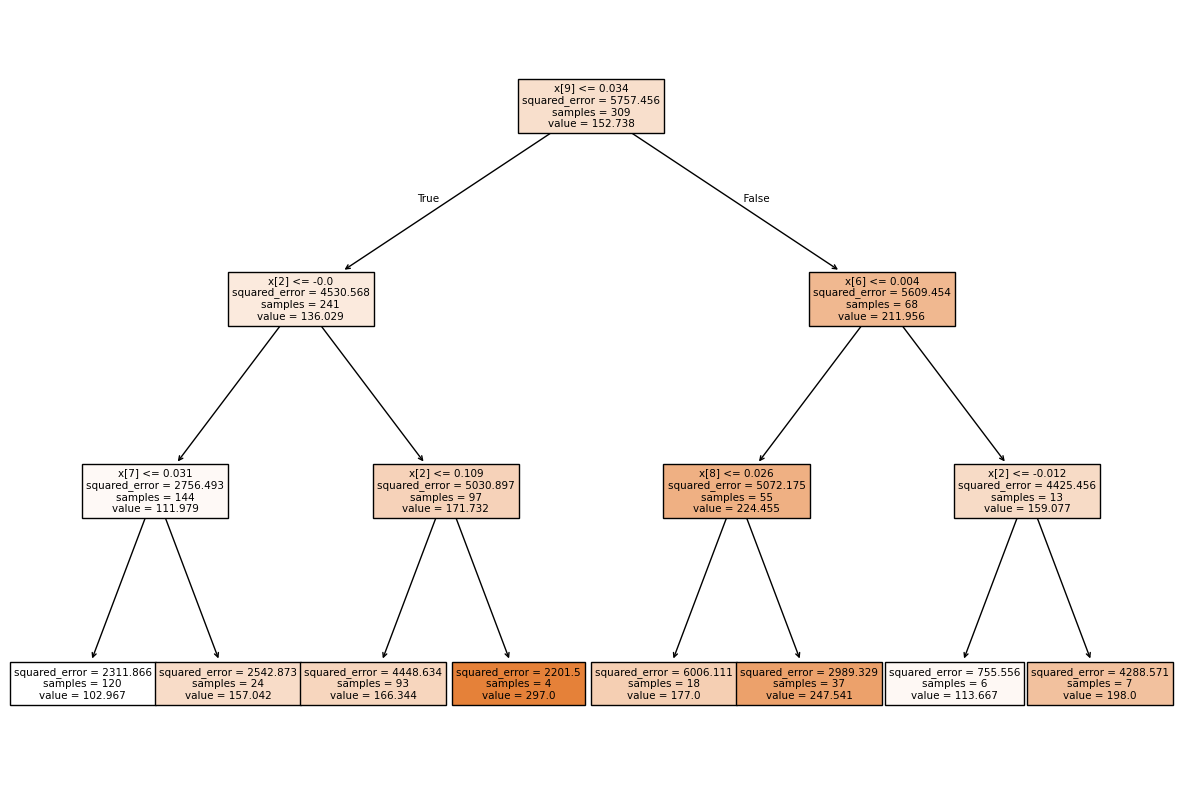

In [30]:
## Visulaize the dicision Tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectdmodel,filled=True)
